In [1]:
import pandas as pd
import numpy as np
import matplotlib .pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv(r"C:\Users\RESHMA\Downloads\Logistic Reg\ad_click_data - LMS.csv")
df

,User_ID,Age,Gender,Geographic_Location,Time_Spent_on_Site,Ad_ID,Ad_Position,Device_Type,Ad_Category,Time_of_Day,Day_of_Week,Previous_Clicks,Clicked
0,1,56.0,Male,Suburban,31.01,328,In-Content,Desktop,E-commerce,19,Sat,NaN,0
1,2,46.0,Male,Suburban,55.58,332,Top Banner,Mobile,Gaming,1,Thu,2.0,1
2,3,32.0,Female,Suburban,46.32,129,Footer,Mobile,E-commerce,19,Wed,2.0,1
3,4,60.0,Male,Urban,59.10,473,Side Panel,Mobile,E-commerce,9,Tue,2.0,1
4,5,25.0,Male,Urban,47.77,254,Top Banner,Desktop,Finance,17,Wed,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,NaN,Male,Rural,25.06,420,Top Banner,Mobile,E-commerce,14,Sun,2.0,1
9996,9997,29.0,Female,Urban,7.76,301,In-Content,Desktop,Travel,14,Wed,3.0,0
9997,9998,18.0,Male,Suburban,28.77,432,Side Panel,Mobile,Gaming,3,Thu,2.0,1
9998,9999,25.0,Female,Urban,27.71,140,Side Panel,Desktop,Finance,13,Mon,2.0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              10000 non-null  int64  
 1   Age                  9500 non-null   float64
 2   Gender               10000 non-null  object 
 3   Geographic_Location  10000 non-null  object 
 4   Time_Spent_on_Site   9500 non-null   float64
 5   Ad_ID                10000 non-null  int64  
 6   Ad_Position          10000 non-null  object 
 7   Device_Type          10000 non-null  object 
 8   Ad_Category          10000 non-null  object 
 9   Time_of_Day          10000 non-null  int64  
 10  Day_of_Week          10000 non-null  object 
 11  Previous_Clicks      9500 non-null   float64
 12  Clicked              10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [4]:
df.isnull().sum()

User_ID                  0
Age                    500
Gender                   0
Geographic_Location      0
Time_Spent_on_Site     500
Ad_ID                    0
Ad_Position              0
Device_Type              0
Ad_Category              0
Time_of_Day              0
Day_of_Week              0
Previous_Clicks        500
Clicked                  0
dtype: int64

<Axes: >

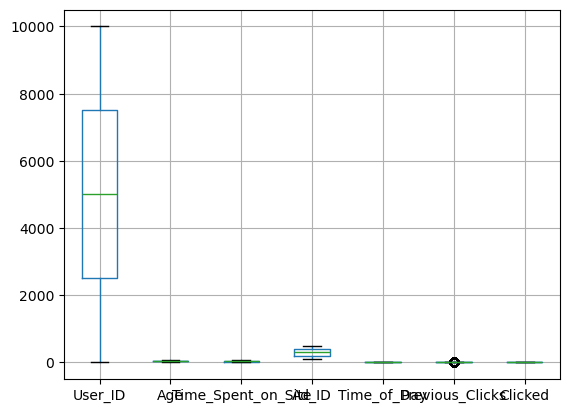

In [5]:
df.boxplot()

In [6]:
df['Age'] = df.groupby(
    ['Ad_Position']
)['Age'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [7]:
df['Previous_Clicks'] = df.groupby(
    ['Geographic_Location']
)['Previous_Clicks'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [8]:
df['Time_Spent_on_Site'] = df.groupby(
    ['Geographic_Location']
)['Time_Spent_on_Site'].transform(
    lambda x: x.fillna(x.mode().iloc[0] if not x.mode().empty else x)
)

In [9]:
df.isnull().sum()

User_ID                0
Age                    0
Gender                 0
Geographic_Location    0
Time_Spent_on_Site     0
Ad_ID                  0
Ad_Position            0
Device_Type            0
Ad_Category            0
Time_of_Day            0
Day_of_Week            0
Previous_Clicks        0
Clicked                0
dtype: int64

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              10000 non-null  int64  
 1   Age                  10000 non-null  float64
 2   Gender               10000 non-null  object 
 3   Geographic_Location  10000 non-null  object 
 4   Time_Spent_on_Site   10000 non-null  float64
 5   Ad_ID                10000 non-null  int64  
 6   Ad_Position          10000 non-null  object 
 7   Device_Type          10000 non-null  object 
 8   Ad_Category          10000 non-null  object 
 9   Time_of_Day          10000 non-null  int64  
 10  Day_of_Week          10000 non-null  object 
 11  Previous_Clicks      10000 non-null  float64
 12  Clicked              10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [11]:
df["Previous_Clicks"].value_counts()

Previous_Clicks
1.0    3703
2.0    2426
0.0    2088
3.0    1145
4.0     462
5.0     135
6.0      32
7.0       8
8.0       1
Name: count, dtype: int64

In [12]:
geo=df.groupby("Geographic_Location")["Previous_Clicks"].size().reset_index(name="count")
geo

,Geographic_Location,count
0,Rural,1018
1,Suburban,2990
2,Urban,5992


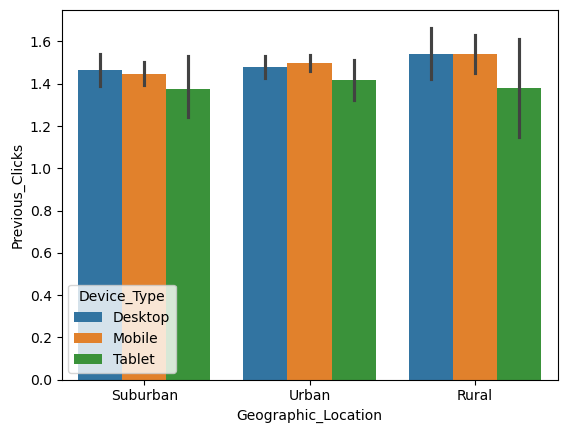

In [13]:
sns.barplot(
    x="Geographic_Location",
    y="Previous_Clicks",
    hue="Device_Type",
    data=df
)
plt.show()


In [14]:
time=df.groupby("Time_Spent_on_Site")["Time_of_Day"].size().reset_index(name="count")
time

,Time_Spent_on_Site,count
0,0.51,3
1,0.52,2
2,0.53,2
3,0.55,2
4,0.56,1
...,...,...
4732,59.96,2
4733,59.97,1
4734,59.98,1
4735,59.99,4


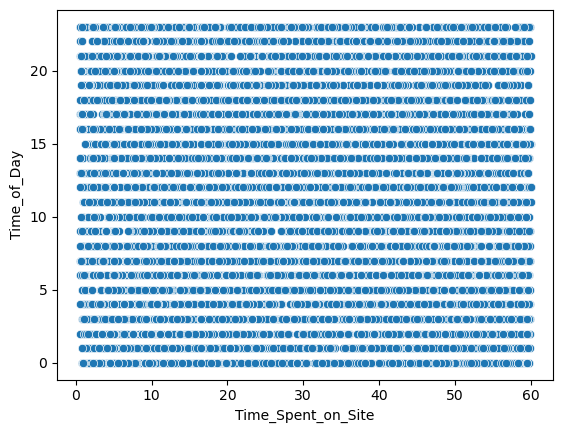

In [15]:
sns.scatterplot(
    x="Time_Spent_on_Site",
    y="Time_of_Day",
    data=df
)
plt.show()


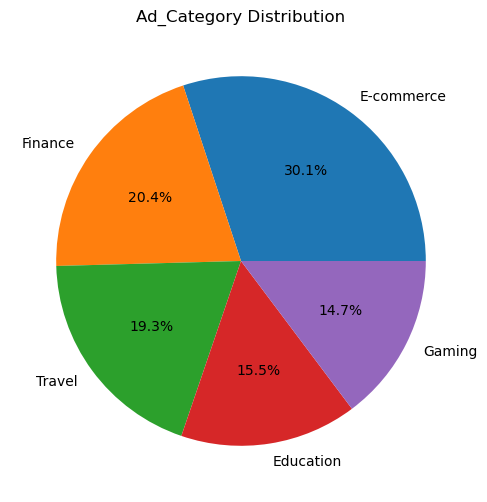

In [16]:
plt.figure(figsize=(8, 6))

plt.pie(
    df["Ad_Category"].value_counts(),
    labels=df["Ad_Category"].value_counts().index,
    autopct="%1.1f%%"
)

plt.title("Ad_Category Distribution")
plt.show()


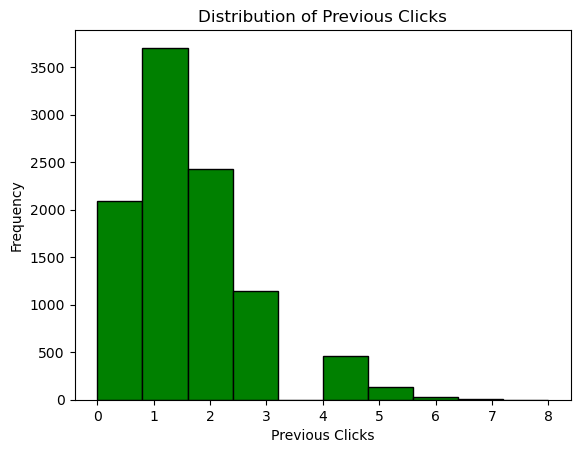

In [17]:
plt.hist(
    df["Previous_Clicks"],
    bins=10,
    color="green",
    edgecolor="black"
)

plt.xlabel("Previous Clicks")
plt.ylabel("Frequency")
plt.title("Distribution of Previous Clicks")
plt.show()




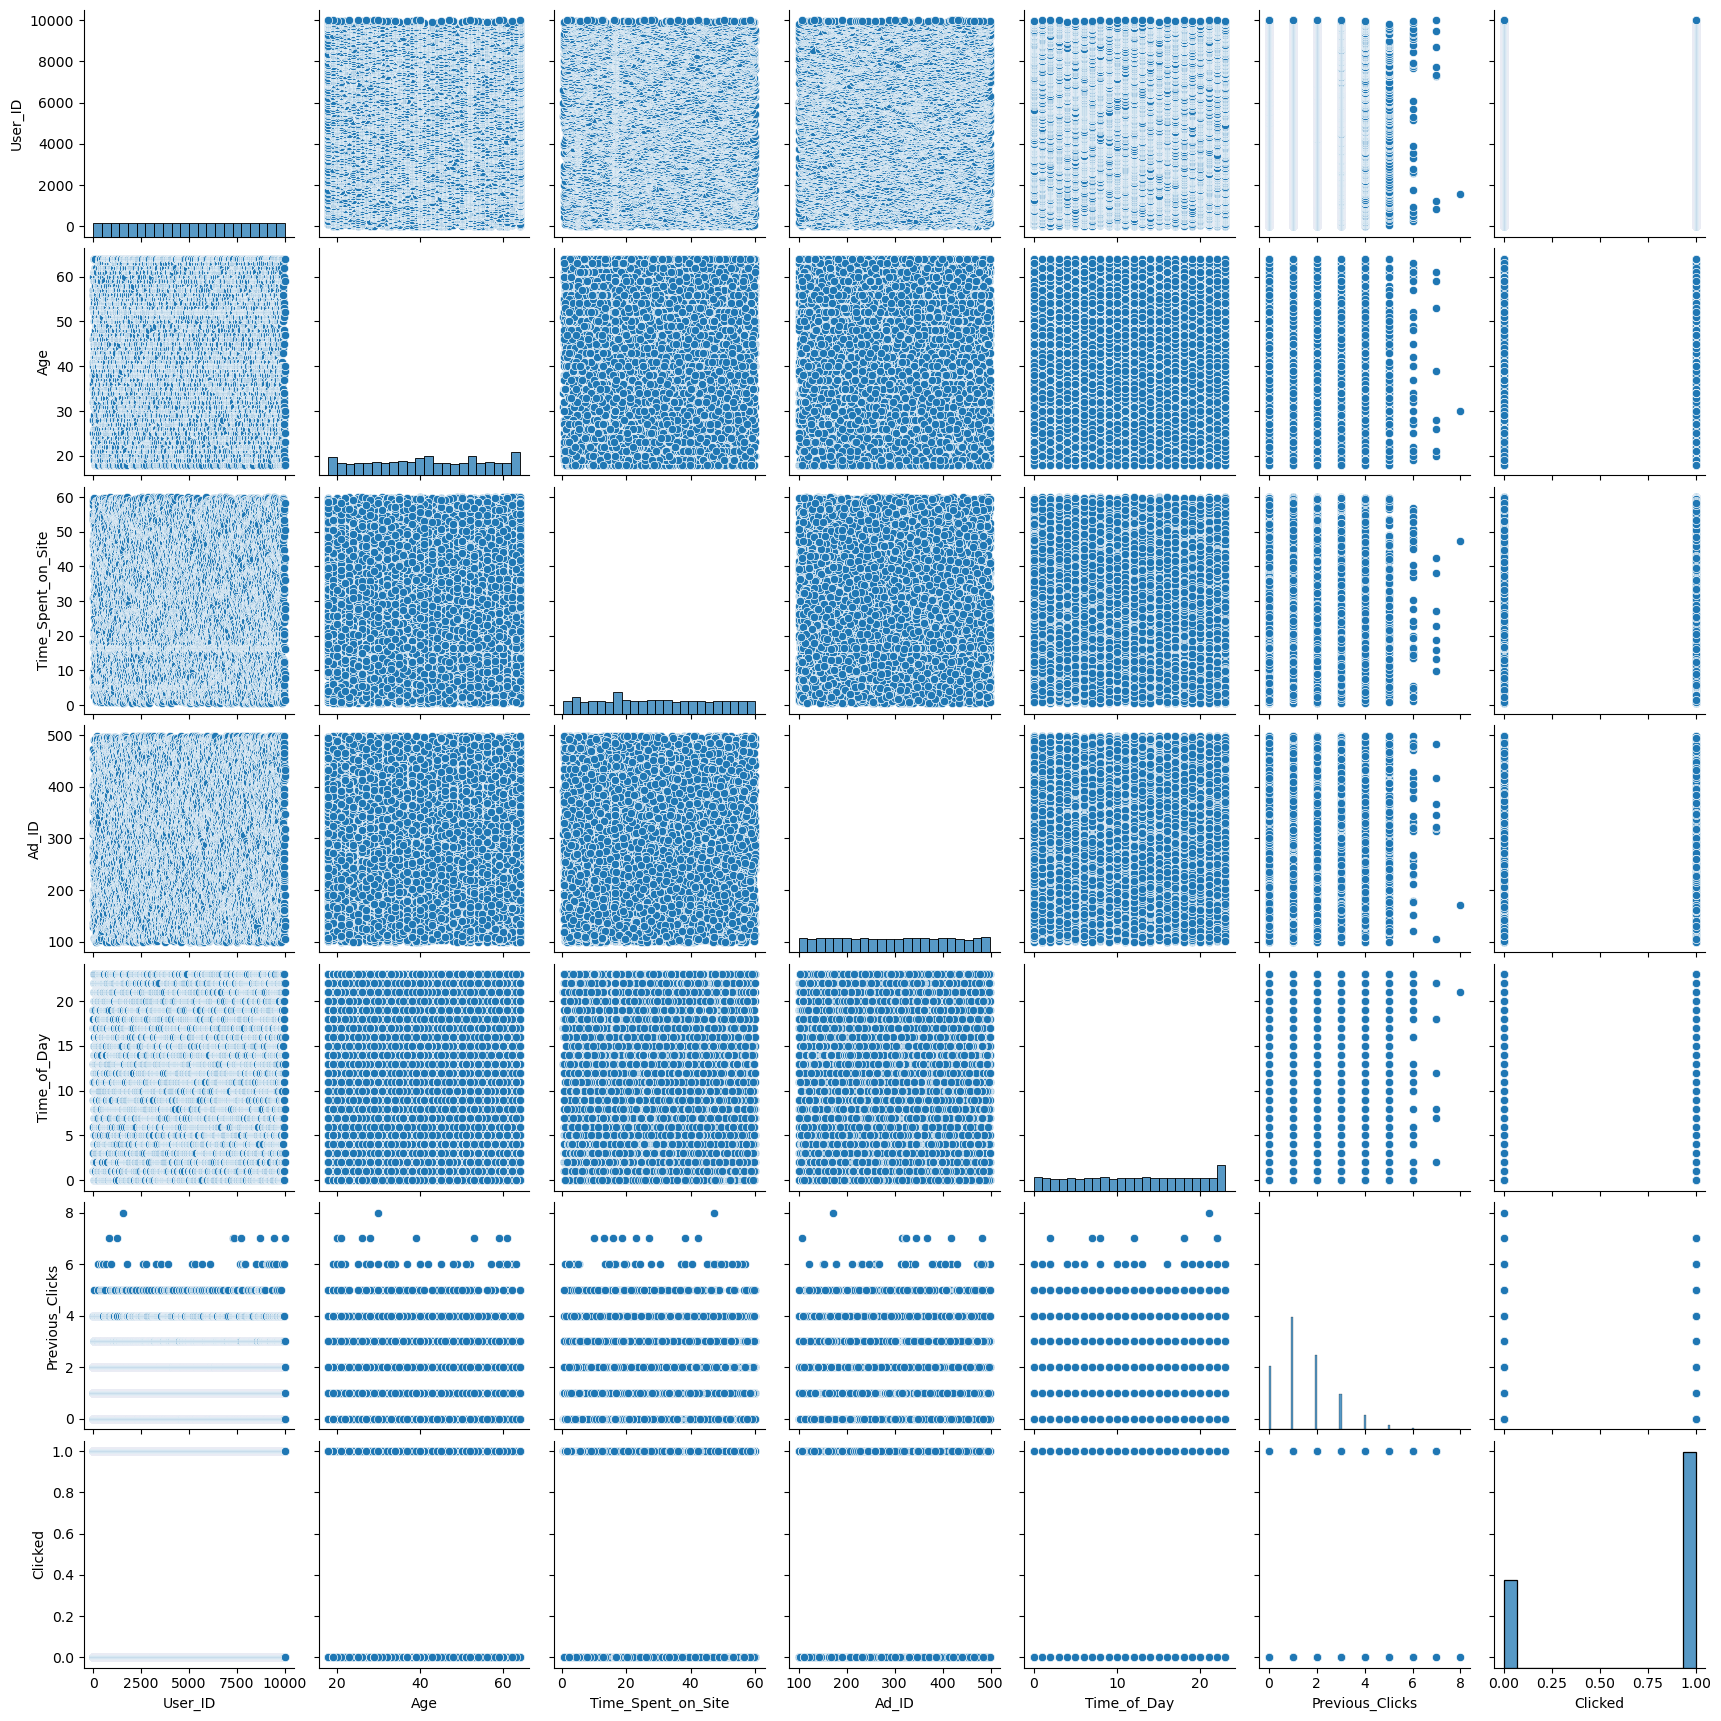

In [18]:
sns.pairplot(df)
plt.show()

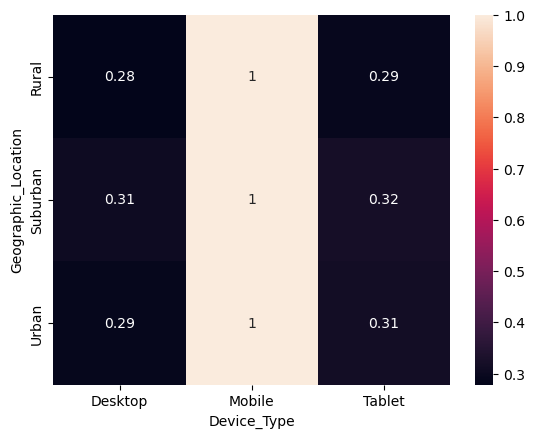

In [19]:
pivot = df.pivot_table(
    values="Clicked",
    index="Geographic_Location",
    columns="Device_Type",
    aggfunc="mean"
)

sns.heatmap(pivot, annot=True)
plt.show()


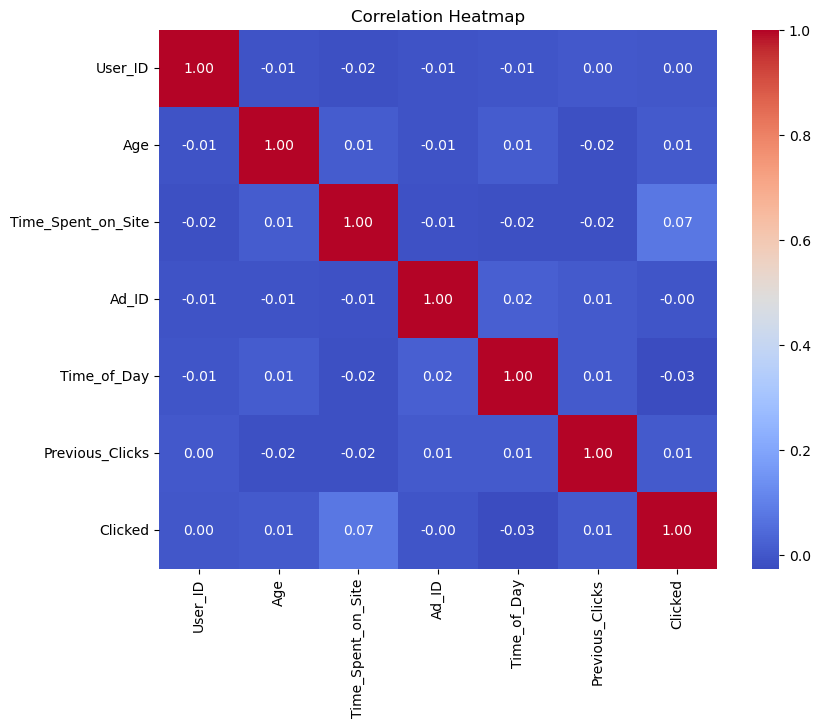

In [20]:
corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(9,7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


In [21]:
df.columns

Index(['User_ID', 'Age', 'Gender', 'Geographic_Location', 'Time_Spent_on_Site',
       'Ad_ID', 'Ad_Position', 'Device_Type', 'Ad_Category', 'Time_of_Day',
       'Day_of_Week', 'Previous_Clicks', 'Clicked'],
      dtype='object')

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   User_ID              10000 non-null  int64  
 1   Age                  10000 non-null  float64
 2   Gender               10000 non-null  object 
 3   Geographic_Location  10000 non-null  object 
 4   Time_Spent_on_Site   10000 non-null  float64
 5   Ad_ID                10000 non-null  int64  
 6   Ad_Position          10000 non-null  object 
 7   Device_Type          10000 non-null  object 
 8   Ad_Category          10000 non-null  object 
 9   Time_of_Day          10000 non-null  int64  
 10  Day_of_Week          10000 non-null  object 
 11  Previous_Clicks      10000 non-null  float64
 12  Clicked              10000 non-null  int64  
dtypes: float64(3), int64(4), object(6)
memory usage: 1015.8+ KB


In [23]:
df = df.drop(columns=["Gender", "User_ID", "Ad_ID"])

In [24]:
df.columns

Index(['Age', 'Geographic_Location', 'Time_Spent_on_Site', 'Ad_Position',
       'Device_Type', 'Ad_Category', 'Time_of_Day', 'Day_of_Week',
       'Previous_Clicks', 'Clicked'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  10000 non-null  float64
 1   Geographic_Location  10000 non-null  object 
 2   Time_Spent_on_Site   10000 non-null  float64
 3   Ad_Position          10000 non-null  object 
 4   Device_Type          10000 non-null  object 
 5   Ad_Category          10000 non-null  object 
 6   Time_of_Day          10000 non-null  int64  
 7   Day_of_Week          10000 non-null  object 
 8   Previous_Clicks      10000 non-null  float64
 9   Clicked              10000 non-null  int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 781.4+ KB


In [26]:
from sklearn.preprocessing import LabelEncoder

X = df.drop(columns=["Time_of_Day"])   # example target
y = df["Time_of_Day"]




In [27]:
X = pd.get_dummies(X, drop_first=True)


In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)



In [29]:
# Train–test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test  = scaler.transform(x_test)

In [31]:
model = LogisticRegression()
model.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [32]:
# make predictions
y_pred = model.predict(x_test)

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


LR = LogisticRegression(max_iter=1000)

param_grid = {
    "solver": ["lbfgs", "liblinear", "saga"],
    "penalty": ["l1", "l2", "elasticnet"],
    "C": [0.01, 0.1, 1, 10]
}

grid = GridSearchCV(
    estimator=LR,
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid.fit(x_train, y_train)

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegre...max_iter=1000)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2', ...], 'solver': ['lbfgs', 'liblinear', ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",'accuracy'
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",-1
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;-

In [34]:
print(grid.best_params_) # it prints the best one

{'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [35]:
best_model=grid.best_estimator_
best_model

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'l1'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",0.01
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multiclass

In [67]:
from sklearn.tree import DecisionTreeClassifier

# split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# model
dt_model = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=5,
    min_samples_leaf=3,
    random_state=42
)

# train
dt_model.fit(X_train, y_train)

# predict
y_train_pred = dt.predict(X_train)   
y_test_pred  = dt.predict(X_test)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))


Train Accuracy: 0.059375
Test Accuracy: 0.0305


In [68]:
# feature importance

from sklearn.tree import DecisionTreeClassifier
import pandas as pd

importance = dt_model.feature_importances_
feature_names = X_train.columns


feature_importance_df = pd.DataFrame({
'Feature': feature_names,
'Importance': importance
}).sort_values(by='Importance', ascending=False)


print("\nFeature Importance:\n")
feature_importance_df


Feature Importance:



,Feature,Importance
1,Time_Spent_on_Site,0.543971
0,Age,0.123503
2,Previous_Clicks,0.103484
5,Geographic_Location_Urban,0.040815
9,Device_Type_Mobile,0.036887
18,Day_of_Week_Thu,0.036540
4,Geographic_Location_Suburban,0.036472
8,Ad_Position_Top Banner,0.035486
12,Ad_Category_Finance,0.029513
19,Day_of_Week_Tue,0.013328


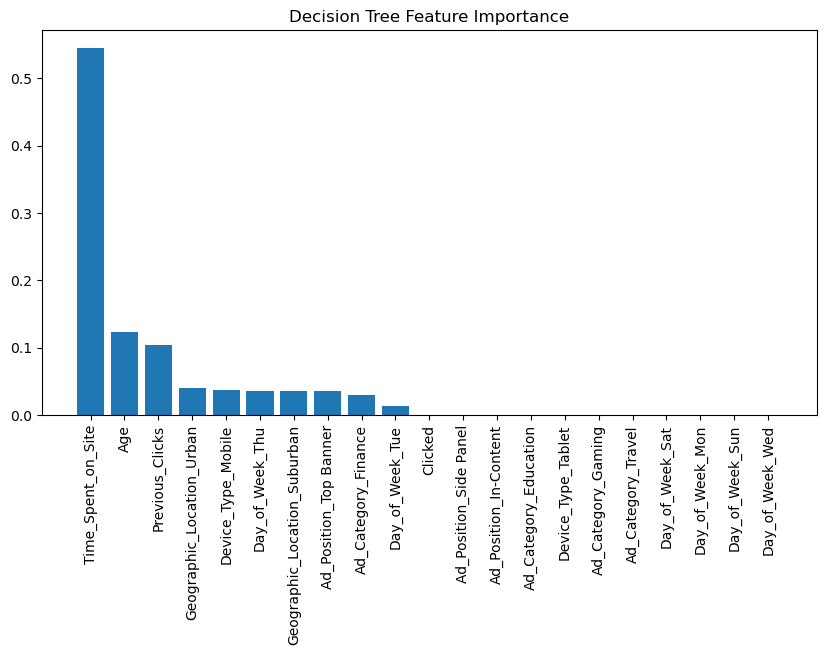

In [69]:
# feature importance plot

plt.figure(figsize=(10, 5))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.title('Decision Tree Feature Importance')
plt.show()

In [65]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n")
print(classification_report(y_test, y_test_pred))

tn = cm[0, 0] 
fp = cm[0, 1]
fn = cm[1, 0]
tp = cm[1, 1]

specificity = tn / (tn + fp)

print("Specificity :", np.round(specificity, 4))



Confusion Matrix:
 [[ 0  1  0  0 61  5  0  1  0  0  0  0  0  0  0  0  2  2  7  0  0  0  0  1]
 [ 0  2  0  0 55  6  0  3  0  0  0  0  1  0  0  0  1  0  9  0  0  0  0  1]
 [ 0  3  0  0 62 10  0  1  0  0  0  0  0  0  0  1  0  0 12  0  0  2  0  0]
 [ 0  2  0  0 52  7  0  2  0  0  1  1  1  0  0  0  0  0 11  0  0  0  0  0]
 [ 0  1  0  0 50  8  0  0  0  0  0  0  0  0  0  0  0  0 12  0  1  2  1  0]
 [ 0  1  0  0 62  2  0  0  0  0  0  0  0  0  0  1  0  0 11  0  0  2  0  0]
 [ 0  1  0  0 58  8  0  2  1  0  0  1  1  0  0  1  0  2  8  0  0  0  0  0]
 [ 0  5  0  0 49 11  0  0  0  0  0  0  1  0  0  0  0  0  6  0  0  2  0  0]
 [ 0  6  0  0 56 10  0  1  0  0  0  0  0  0  0  0  0  0 13  0  0  0  0  0]
 [ 0  1  0  0 60 10  0  1  0  0  0  1  0  0  0  0  0  1  9  0  0  2  0  1]
 [ 0  4  1  0 62  8  0  0  0  0  0  0  1  0  0  1  0  0 13  0  1  0  1  1]
 [ 0  4  0  0 52  4  0  0  0  0  0  0  1  0  0  0  0  0  8  0  0  0  0  0]
 [ 0  4  0  0 68  9  0  1  0  0  0  0  0  0  0  0  0  0  9  0  0  0  1  1]
 [ 0 